In [3]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage
import warnings
warnings.filterwarnings("ignore")

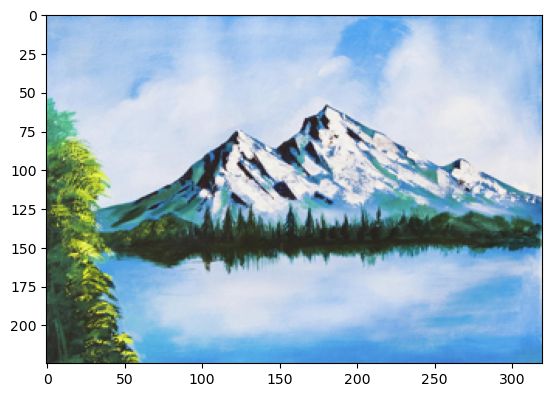

In [5]:
image=Image.open('/home/nmit/Downloads/the-snow-mountain-radhakrishnan-v-k.jpg')
image=image.resize((320,225))
image=np.array(image)
plt.imshow(image)

In [6]:
# Dark side of the image ??

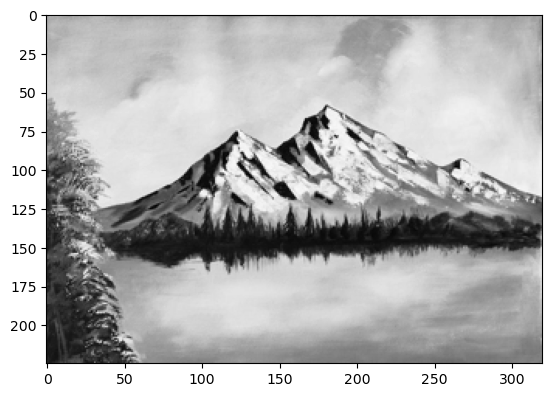

In [7]:
# Making the gray scale of the image
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [8]:
# Region based Segmentation of the image (2 Folds )

In [9]:
# What if we use the mean of the pixels in the whole image as threshold and kinda use it for segmentation
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
gray_segmented=arr.reshape(gray.shape[0],gray.shape[1])

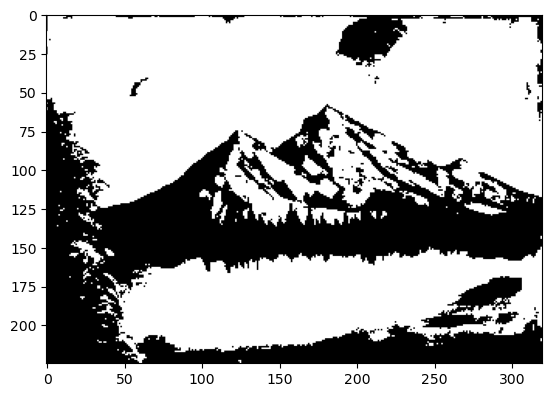

In [10]:
plt.imshow(gray_segmented,cmap='gray')

In [11]:
# Region based Segmentaion of the image (5 Folds)

In [12]:
# What if we tune the above function more??
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
gray_segmented_2=arr.reshape(gray.shape[0],gray.shape[1])

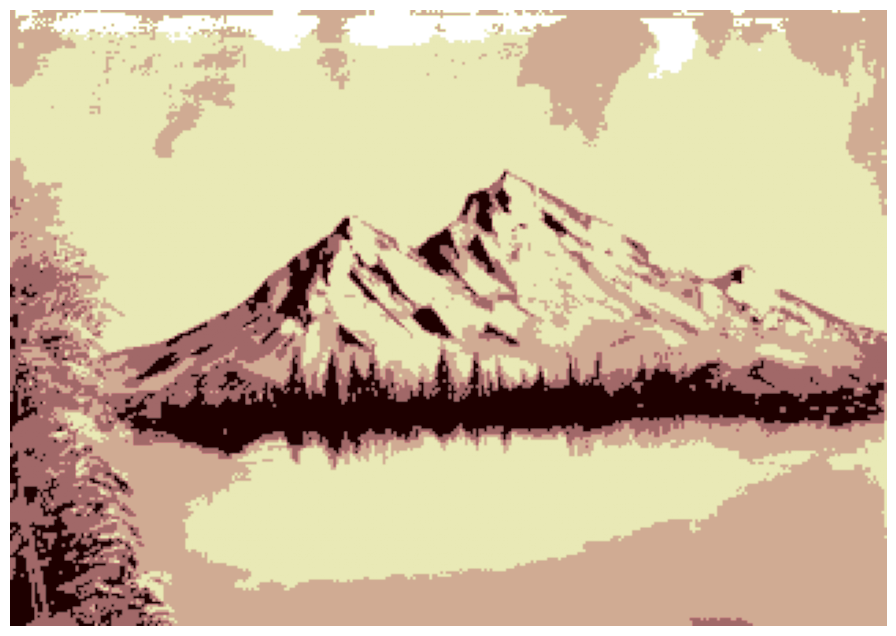

In [13]:
# There are 5 segments in the below image :)
plt.figure(figsize=(18,8))
plt.imshow(gray_segmented_2,cmap='pink')
plt.axis("off")
plt.show()

In [14]:
# Segmentation Using Clustering

In [15]:
im=image/255
pic=im.reshape(im.shape[0]*im.shape[1],im.shape[2])

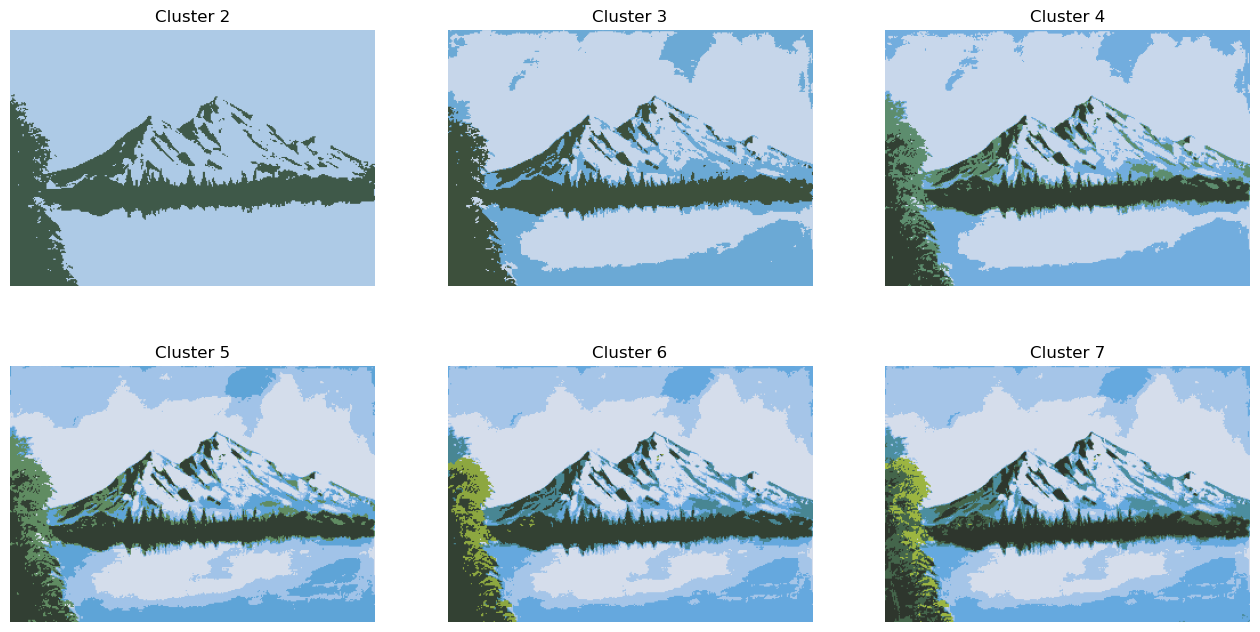

In [16]:
# Since we know 5 segments was looking great on the image we are gonna do 5 clusters here but you can try more too :)
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
count=1
for i in range(2):
    for j in range(3):

        kmeans = KMeans(n_clusters=count+1, random_state=0).fit(pic)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic=pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count+=1
        ax[i][j].set_title('Cluster '+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()